In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# carregar dados
df_colesterol = pd.read_csv('./datasets/multipla.csv')

In [7]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [8]:
# remover coluna Id
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [9]:
# renomear as colunas
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol' ,  
]

In [10]:
# copiar df para df_eda
df_colesterol_eda = df_colesterol.copy()

In [11]:
df_colesterol_bucketing = df_colesterol.copy()

### EDA


In [12]:
# visualizar dados
df_colesterol.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [13]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [14]:
#detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [15]:
# medidas estatisticas 
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [17]:
#coletar medidas das variaveis
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.e_fisicanivel_atividad.mode()

AttributeError: 'DataFrame' object has no attribute 'e_fisicanivel_atividad'

In [18]:
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [ ]:
# inputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso': 'mediana_peso',
                                'altura': mediana_altura}, inplace=True)

In [ ]:
#converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)

In [ ]:
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [ ]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   object 
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


<Axes: xlabel='idade'>

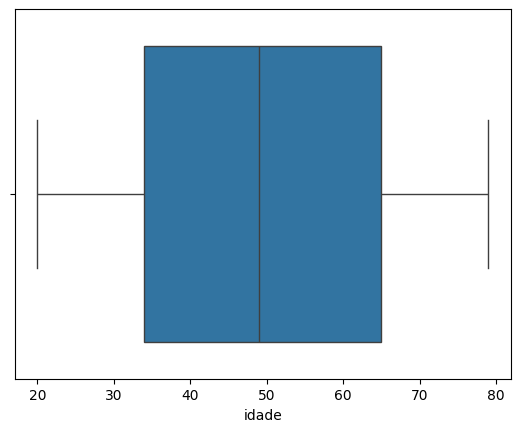

In [19]:
# detectar outilers
sns.boxplot(data=df_colesterol, x='idade')

<Axes: xlabel='peso'>

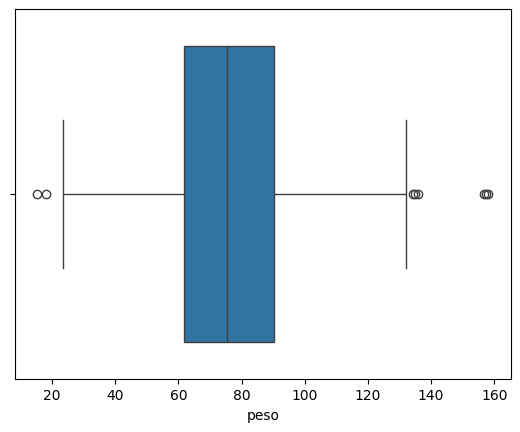

In [ ]:
# detectar outilers
sns.boxplot(data=df_colesterol, x='peso')

In [ ]:
#filtrar publico
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(0)

In [ ]:
#remover publico
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

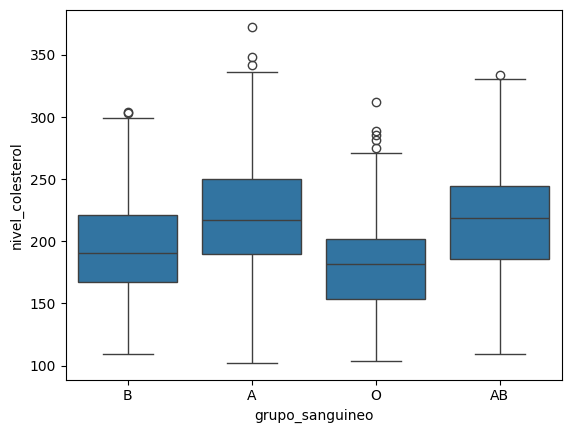

In [ ]:
#cruzamento de variaveis categoricas com nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

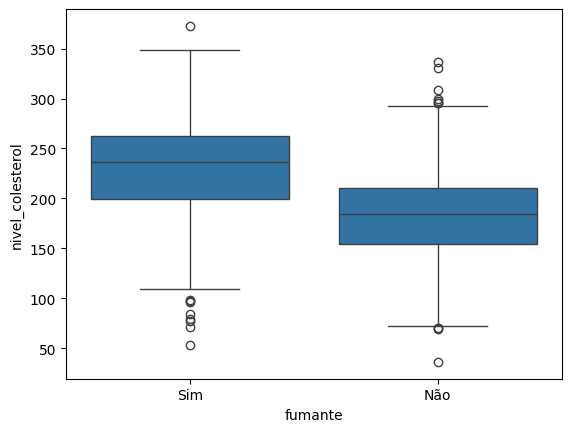

In [20]:
#cruzamento de variaveis categoricas com nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

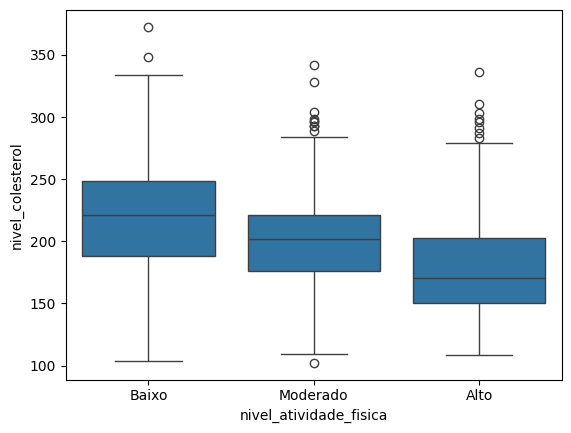

In [ ]:
#cruzamento de variaveis categoricas com nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

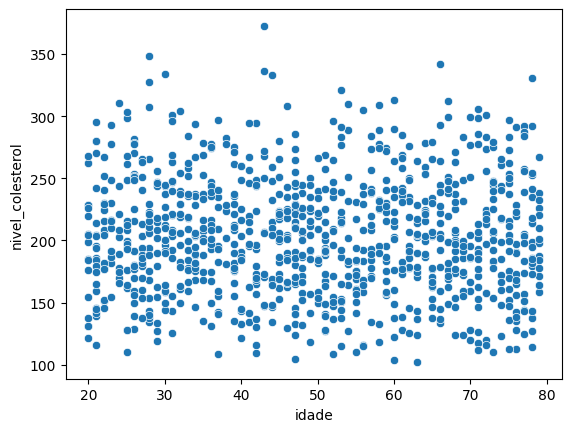

In [ ]:
# cruzamento de variaveis numericas com nivel colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

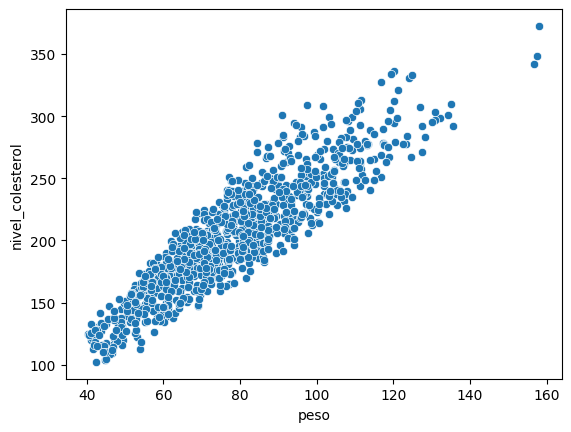

In [ ]:
# cruzamento de variaveis numericas com nivel colesterol
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

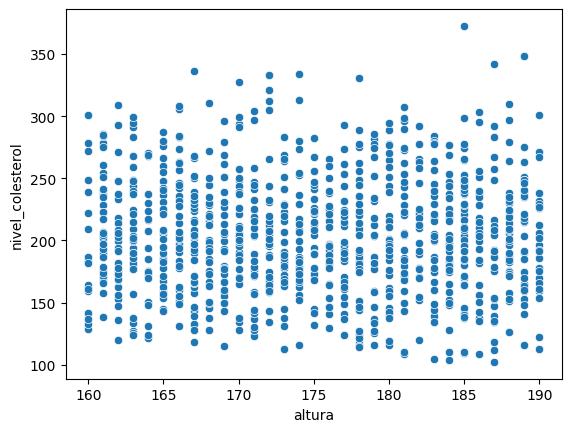

In [ ]:
# cruzamento de variaveis numericas com nivel colesterol
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

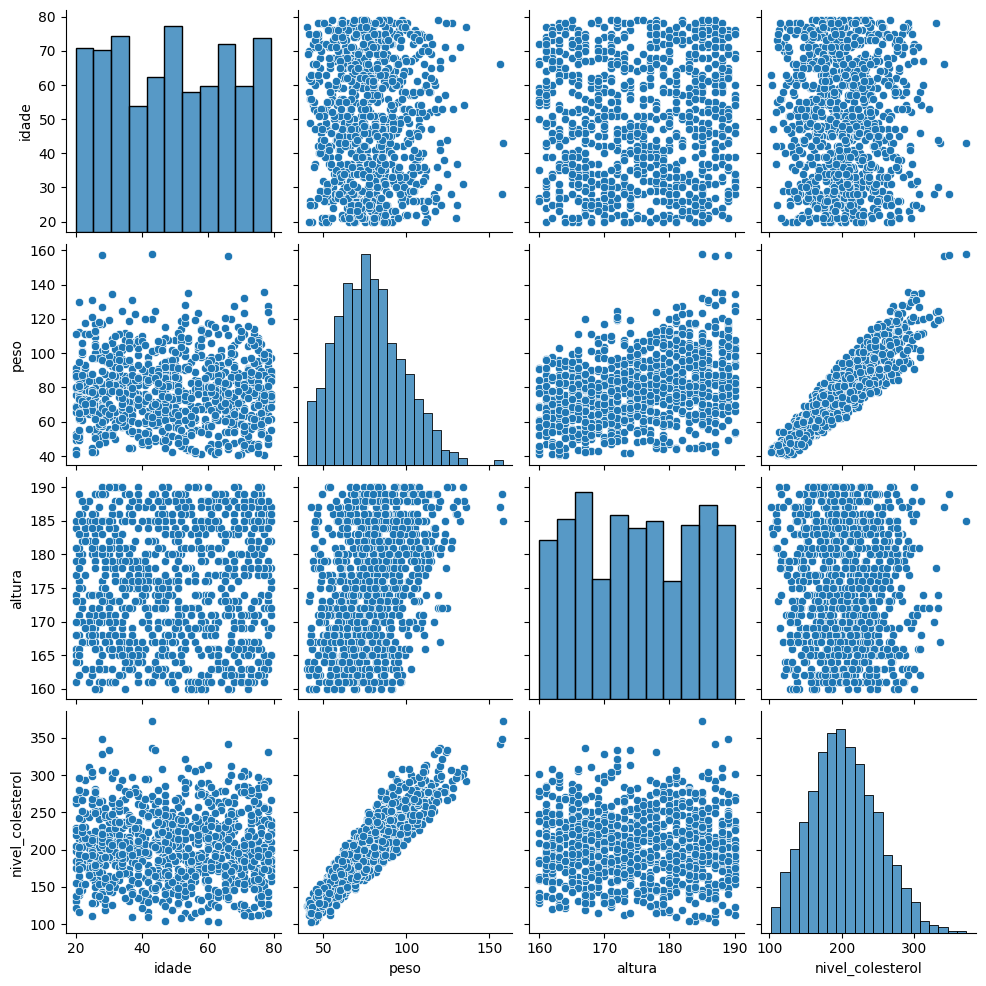

In [ ]:
sns.pairplot(df_colesterol_eda)

In [ ]:
# converter variaveis categoricas em numericas usando one-hot encoder do pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'],dtype='int64')

In [ ]:
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33.0,85.1,186.0,199.63,0,0,1,0,0,1
1,2,68.0,105.0,184.0,236.98,1,0,0,0,1,0
2,3,25.0,64.8,180.0,161.79,0,0,0,1,1,0
3,3,43.0,120.2,167.0,336.24,1,0,0,0,1,0
4,1,79.0,88.5,175.0,226.23,0,1,0,0,1,0
5,1,68.0,66.8,170.0,185.31,0,0,1,0,1,0
6,1,60.0,117.3,181.0,289.33,1,0,0,0,0,1
7,2,35.0,86.9,174.0,216.48,0,0,0,1,0,1
8,1,62.0,81.3,166.0,235.30,0,0,0,1,1,0
10,1,57.0,123.6,183.0,283.87,1,0,0,0,0,1


In [ ]:
#converter variavel categorica ordinal em numerica usando factorize do pandas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0]+1

<Axes: >

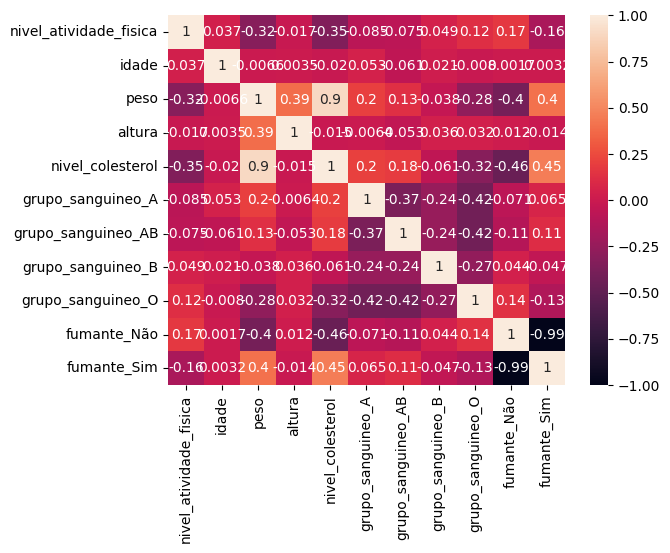

In [ ]:
# mapa de calor com correlação entre as variaveis
plt.Figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

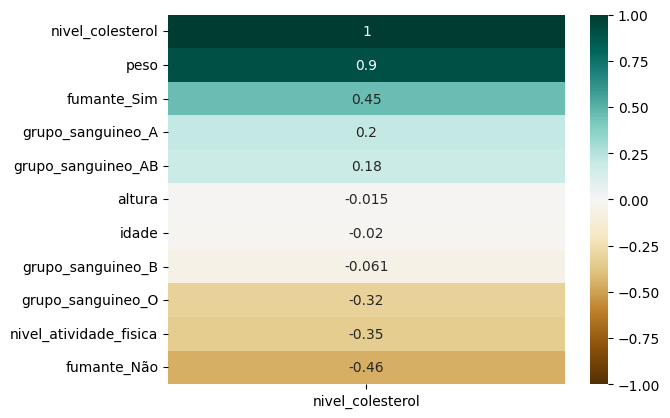

In [ ]:
# formato de ranking, somente correlaçao cm a variavel target (nivel_coleterol)
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [21]:
# Bucketing de idade (intervalos)
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x=df_colesterol_bucketing['idade'], bins=bins_idade, labels=labels_idade, include_lowest=True)

In [23]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

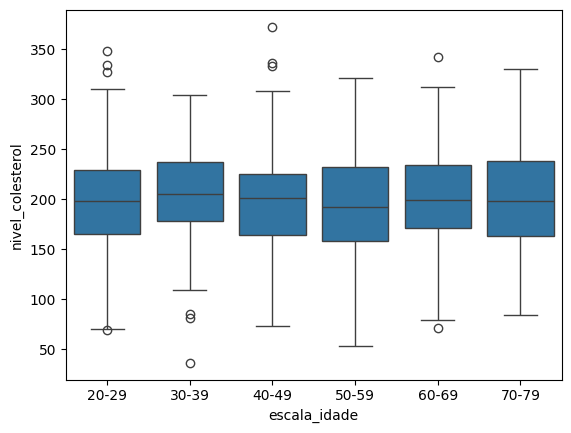

In [22]:
sns.boxplot(df_colesterol_bucketing, x='escala_idade', y='nivel_colesterol')

In [24]:
# Bucketing de peso (intervalos)
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149','150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x=df_colesterol_bucketing['peso'], bins=bins_peso, labels=labels_peso, include_lowest=True)

<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

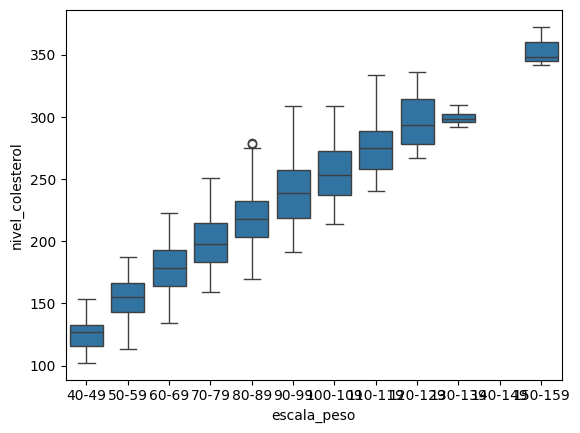

In [25]:
sns.boxplot(df_colesterol_bucketing, x='escala_peso', y='nivel_colesterol')

### Treinando modelo

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [27]:
# criar dataset de treino e teste
#remover publico
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, axis=0, inplace=True)

In [28]:
X = df_colesterol.drop(columns='nivel_colesterol', axis=1)
y = df_colesterol['nivel_colesterol']

In [29]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [30]:
X_train.shape

(674, 6)

In [31]:
# Pipeline
# Imputar moda nas variaveis categoricas
# padronizar variveis numericas
# onehotencode nas variaveis categoricas nominais
# ordinalencoder nas variavei categoricas ordinais 
# Imputar mediana nas variaveis numericas 

# Nomes das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'altura', 'peso']
colunas_ordinais = ['nivel_atividade_fisica']


In [32]:
# transformer Categoricas
transformer_categorias = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
# transformer ordinais
transformer_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [35]:
# transformer numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [36]:
# criar um collun transforme para encapsular as transformações
preprocessador = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categorias, colunas_categoricas),
        ('ord', transformer_ordinais, colunas_ordinais)
    ]
)

In [38]:
# criando o Pipeline principal = pre processamento + treinamento
model_regr = Pipeline(steps=[('preprocessador', preprocessador),
                             ('regressor', LinearRegression())])

In [39]:
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'altura', 'peso']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('regressor', LinearRegression())])

### Analise de metricas


In [40]:
# Calcular predição
y_pred = model_regr.predict(X_test)

In [41]:
# Calcular o R2score
r2_score(y_test, y_pred)

0.9594250724093464

In [42]:
# analisar o erro MEAN
mean_absolute_error(y_test, y_pred)

7.313838031022508

In [1]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

NameError: name 'y_test' is not defined

### Analise de residuos

In [44]:
residuos = y_test - y_pred

In [45]:
# Tranformar os residuos na escala padrao
# X - media / desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

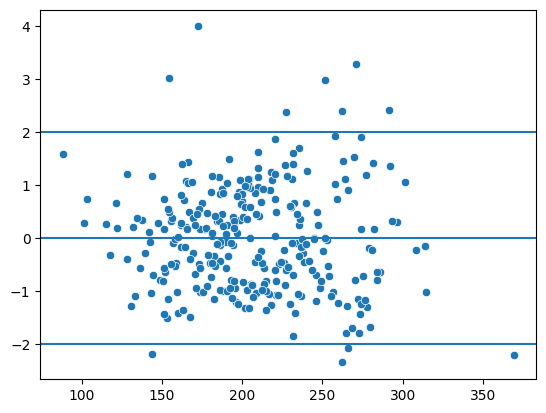

In [46]:
# verificar linearidade dos residuos valores entre -2 + 2
# verificar homocedasticidade: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=+2)


Text(0, 0.5, 'Residuos na escala padrão')

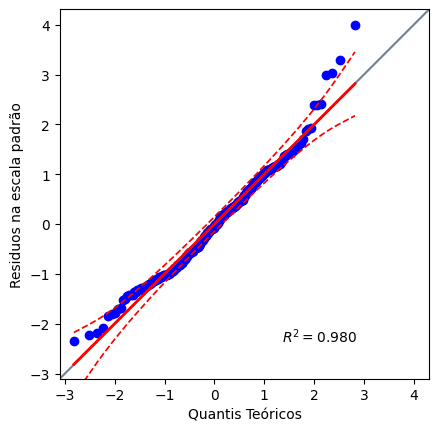

In [49]:
# Testar a normalidade dos residuos
# QQ plot
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')

In [50]:
# teste de normalidade shapiro wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

stat_shapiro, p_value_shapiro = shapiro(residuos)
print("estatistica de teste: {} e P-Value: {}".format(stat_shapiro, p_value_shapiro))


estatistica de teste: 0.9807737729720746 e P-Value: 0.0006268860444494215


In [51]:
# teste de kolmogorov-smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("estatistica de teste: {} e P-Value: {}".format(stat_ks, p_value_ks))

estatistica de teste: 0.42455920998485613 e P-Value: 8.925833190910191e-48


In [52]:
# teste de liliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table' )
print("estatistica de teste: {} e P-Value: {}".format(stat_ll, p_value_ll))

estatistica de teste: 0.04955371030192923 e P-Value: 0.12533323720735612


In [53]:
# teste de normalidade anderson 
stat_and, critical_and, significance_and = anderson(residuos, dist='norm')

In [54]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [55]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [56]:
# teste de homocedasticidade compara os residuos contra o conjunto de testes
pipe = Pipeline(steps=[('preprocessador', preprocessador)])
X_test_transformed = pipe.fit_transform(X_test)

In [57]:
X_test_transformed

array([[-1.44340738, -0.58669129,  0.22608781, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.05685776, -1.20886474, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.35160806, -0.84754575, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.52702423, -1.09014564, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099, -0.35160806,  0.17447081, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.17439938, -1.65277092, ...,  0.        ,
         1.        ,  0.        ]], shape=(289, 10))

In [58]:
#Teste de gold
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]

In [59]:

print("estatistica de teste: {} e P-Value: {}".format(stat_goldfeld, p_value_goldfeld))

estatistica de teste: 0.6716135765253547 e P-Value: 0.9893959472385483


#### Predições


In [60]:
predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'nivel_atividade_fisica': 'Alto',
    'idade': 40,
    'peso': 70,
    'altura': 180
    
}
sample_df =  pd.DataFrame(predicao_individual, index=[1])

In [61]:
sample_df

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura
1,O,Não,Alto,40,70,180


In [62]:
#predição
model_regr.predict(sample_df)

array([165.32375099])

In [63]:
import joblib

In [64]:
# salvar modelo
joblib.dump(model_regr, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']